In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics, model_selection 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [11]:

!cd /home/l4yang/Chinese-MNIST/data
!ls

data  model  preprocessing  RandomForest.ipynb


In [14]:
#code to read the data into one dataframe
df = pd.DataFrame()
for i in range(5):
    df_temp = pd.read_csv(f'../data/processed_chinese_mnist_part_{i}.csv')
    df = df.append(df_temp)
df = df.reset_index(drop = True)

In [15]:
df.head()

,label,cn_label,value,0,1,2,3,4,5,6,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1,零,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,九,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,十,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,百,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,千,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X, y = df.iloc[:,3:], df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [17]:
clf  = RandomForestClassifier()

In [18]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
clf.score(X_test, y_test)

0.561

In [19]:
importance = dict(zip(X.columns, clf.feature_importances_))
importance_sorted = sorted(importance.items(), key=lambda item: item[1], reverse=True)
importance_sorted[:10]

[('2465', 0.0021389024362254054),
 ('2529', 0.001965125785428036),
 ('2401', 0.0019606746218665256),
 ('2398', 0.001954962629022987),
 ('2468', 0.0019302166210925637),
 ('2405', 0.0019277608099091434),
 ('2274', 0.0019071816737590225),
 ('2467', 0.0019021892574275128),
 ('2404', 0.0019005930164016636),
 ('2337', 0.0018783440789594905)]

In [20]:
clf.n_estimators

100

In [21]:
clf.min_samples_split

2

In [22]:
clf.min_samples_leaf

1

In [53]:
parameters = {
    'n_estimators': [10, 20, 30, 50, 70, 100, 150, 200], 
    
}

In [54]:
gs = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, n_jobs = 16)

In [55]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=16,
             param_grid={'n_estimators': [10, 20, 30, 50, 70, 100, 150, 200]})

In [31]:
gs.best_params_

{'n_estimators': 200}

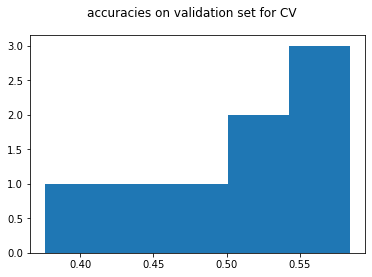

In [66]:
plt.hist(gs.cv_results_['mean_test_score'], bins=5)
plt.suptitle('accuracies on validation set for CV');

In [48]:
clf  = RandomForestClassifier(n_estimators = 200)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5906666666666667

In [49]:
clf  = RandomForestClassifier(n_estimators = 400)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6086666666666667

In [50]:
clf  = RandomForestClassifier(n_estimators = 600)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.613

In [51]:
clf  = RandomForestClassifier(n_estimators = 1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6183333333333333

In [52]:
clf  = RandomForestClassifier(n_estimators = 2000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.619

In [60]:
pl = Pipeline([
    ('pca', PCA(svd_solver='full')),
    ('RF', RandomForestClassifier(n_estimators = 1000))
])